In [ ]:
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Define the source and target file paths
source_file_path = './data.txt'
target_file_path = './output.txt'
try:
    # Read the source file with UTF-8 encoding
    with open(source_file_path, 'r', encoding='utf-8') as source_file:
        content = source_file.read()

    # Filter only alphabetic characters
    filtered_content = ''.join([char for char in content if char.isalpha() or char.isspace()])

    # Write the filtered content to the target file with UTF-8 encoding
    with open(target_file_path, 'w', encoding='utf-8') as target_file:
        target_file.write(filtered_content)

    print(f"Filtered content has been written to {target_file_path}")

except UnicodeDecodeError as e:
    print(f"An error occurred while reading the file: {e}")

Filtered content has been written to ./output.txt


In [ ]:
# Define the source and target file paths
source_file_path = './output.txt'

with open(source_file_path, 'r', encoding='utf-8') as source_file:
    content = source_file.read()

# Extract words using a regular expression
words = re.findall(r'\b\w+\b', content.lower())

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords from the words list
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_count = Counter(filtered_words)

# Filter words with frequency greater than 10
filtered_word_count = {word: count for word, count in word_count.items() if count > 10}

# Sort the word frequency count by frequency (highest to lowest)
sorted_word_count = dict(sorted(filtered_word_count.items(), key=lambda item: item[1], reverse=True))

# Print the sorted word frequency count
for word, count in sorted_word_count.items():
    print(f'{word}: {count}')

# Convert to a sorted list of tuples for plotting
sorted_word_list = sorted(sorted_word_count.items(), key=lambda item: item[1], reverse=True)

# Unpack the words and counts for plotting
words, counts = zip(*sorted_word_list)



walk: 744
media: 716
omitted: 716
room: 665
joined: 652
community: 640
apartment: 509
dm: 497
raleigh: 489
mins: 478
bus: 460
available: 445
rent: 360
private: 317
amenities: 298
selling: 289
month: 286
stop: 277
utilities: 262
please: 260
campus: 258
looking: 257
parking: 250
contact: 250
july: 245
spacious: 245
bed: 242
added: 242
kitchen: 231
oven: 225
bath: 224
food: 224
free: 216
table: 215
ncsu: 213
shared: 211
nc: 211
fully: 203
centennial: 202
bathroom: 200
washer: 196
lease: 194
details: 193
dryer: 193
lion: 193
attached: 192
refrigerator: 192
go: 189
dishwasher: 185
availability: 183
min: 178
location: 175
store: 173
equipped: 171
may: 167
mattress: 166
microwave: 166
sublease: 164
message: 161
line: 160
wolfline: 160
next: 156
interested: 154
wifi: 151
august: 150
chair: 146
th: 143
wolf: 138
anyone: 130
dollar: 128
electricity: 122
close: 119
deleted: 118
avent: 118
house: 118
ferry: 117
queries: 115
minute: 115
bb: 114
furnished: 113
water: 111
st: 108
space: 107
goraleigh

<ipython-input-9-81882bb6498f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


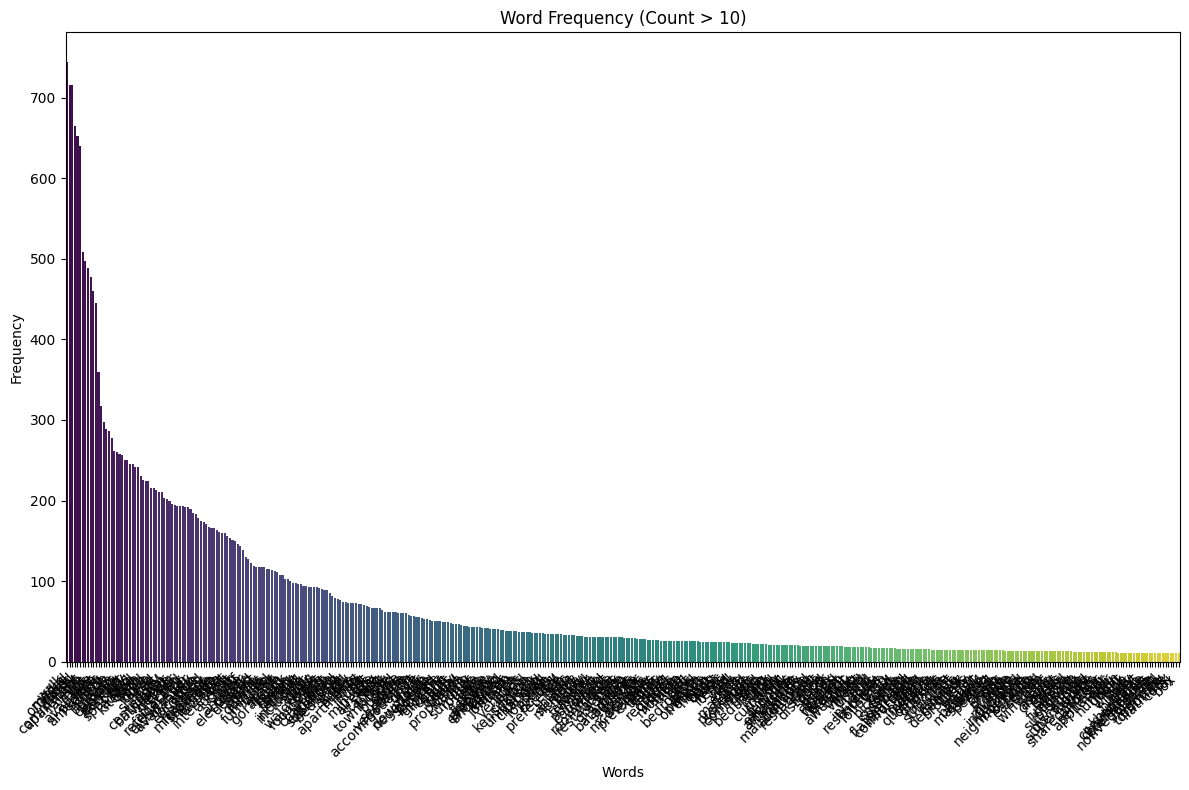

In [ ]:
    # Plot using seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency (Count > 10)')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


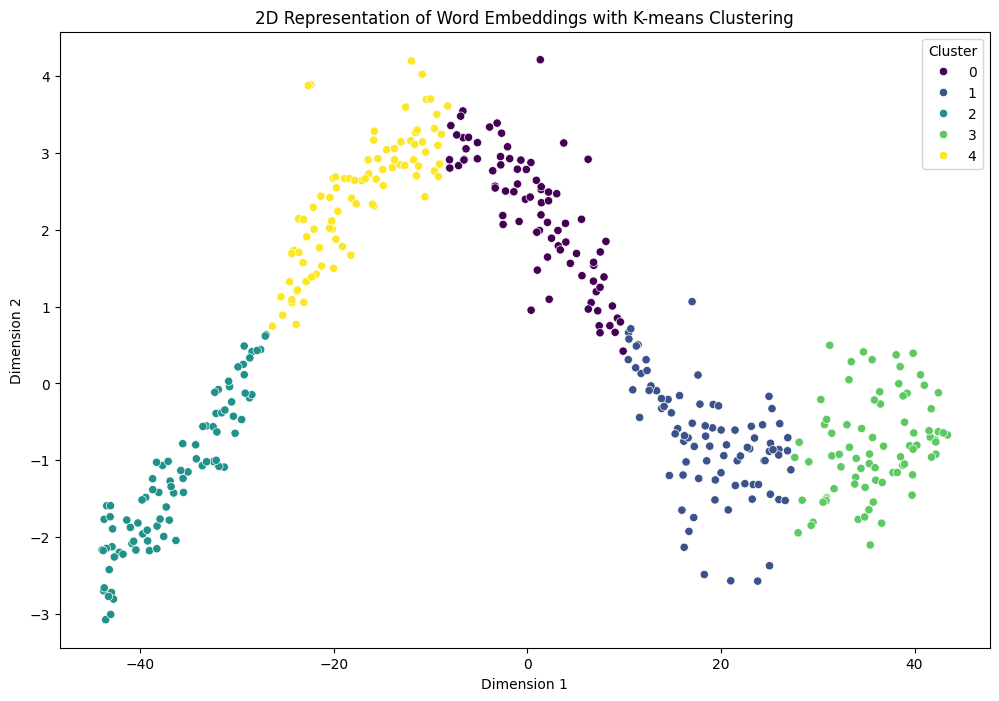

In [ ]:
# Prepare data for Word2Vec model
sentences = [filtered_words]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors for the filtered words
word_vectors = {word: model.wv[word] for word in filtered_word_count.keys()}

# Convert word vectors to a NumPy array for t-SNE
word_vecs_array = np.array(list(word_vectors.values()))


# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vecs_2d = tsne.fit_transform(word_vecs_array)

# Apply K-means clustering
num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(word_vecs_2d)

# Prepare DataFrame for plotting
import pandas as pd

df = pd.DataFrame(word_vecs_2d, columns=['Dimension1', 'Dimension2'])
df['Word'] = filtered_word_count.keys()
df['Cluster'] = clusters

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Dimension1', y='Dimension2', hue='Cluster', data=df, palette='viridis', marker='o')

# Annotate the points with words
# for i, word in enumerate(df['Word']):
#     plt.annotate(word, (df.iloc[i]['Dimension1'], df.iloc[i]['Dimension2']),
#                  textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Representation of Word Embeddings with K-means Clustering')
plt.legend(title='Cluster')
plt.show()